## Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings

#removing warnings
warnings.filterwarnings('ignore')

## Load and Read Data to a Dataframe

In [2]:
df= pd.read_csv("aa.txt", sep = ";")
df.head()

,ID,tumor_thickness,regularity_of_cell_size,regularity_of_cell_shape,cell_stickiness,non_cytoplasm_nuclei,nucleus_texture,small_structures_in_nucleoli,cell_proliferation,cell_uniformity,tumor_type,SVM_Classifier
0,1000025,5,1,1,1,2,1,3,1,1,0,0
1,1002945,5,4,4,5,7,10,3,2,1,0,1
2,1015425,3,1,1,1,2,2,3,1,1,0,0
3,1016277,6,8,8,1,3,4,3,7,1,0,1
4,1017023,4,1,1,3,2,1,3,1,1,0,0


### Droping ID column as it is of no use in detecting Breast Cancer

In [3]:
df = df.drop('ID',1)
df.describe()

,tumor_thickness,regularity_of_cell_size,regularity_of_cell_shape,cell_stickiness,non_cytoplasm_nuclei,nucleus_texture,small_structures_in_nucleoli,cell_proliferation,cell_uniformity,tumor_type,SVM_Classifier
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,4.471318,3.184496,3.255814,2.893023,3.275969,3.654264,3.497674,2.955039,1.613953,0.359690,0.365891
std,2.858115,3.058195,2.975258,2.918036,2.247455,3.650045,2.459374,3.120682,1.744056,0.480282,0.482053
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000


#### Let's check if there is any null value present in the dataframe

In [4]:
df.isnull().any()

tumor_thickness                 False
regularity_of_cell_size         False
regularity_of_cell_shape        False
cell_stickiness                 False
non_cytoplasm_nuclei            False
nucleus_texture                 False
small_structures_in_nucleoli    False
cell_proliferation              False
cell_uniformity                 False
tumor_type                      False
SVM_Classifier                  False
dtype: bool

#### There is no null value present in the dataframe.
<hr>

#### Let's drop if there is any duplicate values present in dataframe.

In [5]:
df1 =df.drop_duplicates()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 644
Data columns (total 11 columns):
tumor_thickness                 443 non-null int64
regularity_of_cell_size         443 non-null int64
regularity_of_cell_shape        443 non-null int64
cell_stickiness                 443 non-null int64
non_cytoplasm_nuclei            443 non-null int64
nucleus_texture                 443 non-null int64
small_structures_in_nucleoli    443 non-null int64
cell_proliferation              443 non-null int64
cell_uniformity                 443 non-null int64
tumor_type                      443 non-null int64
SVM_Classifier                  443 non-null int64
dtypes: int64(11)
memory usage: 41.5 KB


### Ploting the dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001639F079908>,
      dtype=object)

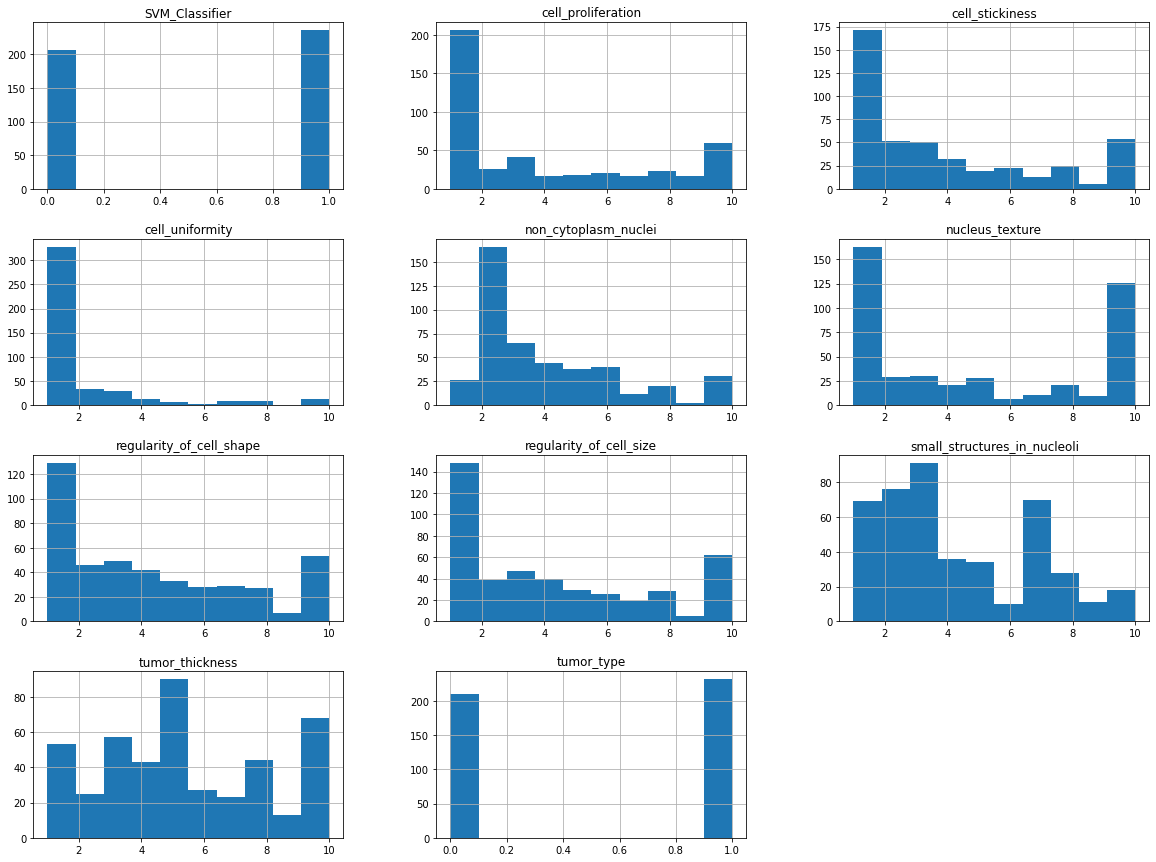

In [6]:
df1.hist(figsize=(20,15))

### spliting dataframe for training and testing

In [7]:
df2 = df1.drop('SVM_Classifier',axis=1)
target = df1['SVM_Classifier']
x,tx,y,ty = train_test_split(df2,target,test_size=0.3,random_state=0)

In [8]:
x.shape,y.shape,tx.shape,ty.shape

((310, 10), (310,), (133, 10), (133,))

### Creating model for detection

In [9]:
model = SVC()
model.fit(x,y)

pred = model.predict(tx)
score = round(accuracy_score(pred,ty)*100,2)
print(f'Accuracy: {score}%')

Accuracy: 100.0%


We got an accuracy of 100.0% with this model. <hr>
Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [10]:
cm = confusion_matrix(pred,ty)
cm

array([[64,  0],
       [ 0, 69]], dtype=int64)

Text(33.0, 0.5, 'True')

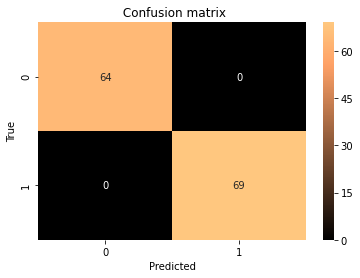

In [11]:
sns.heatmap(cm,annot=True,cmap='copper', fmt='d')
plt.title(' Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

So with this model, we have 69 positives, 64 negatives, 0 false positives, and 0 false negatives.

In [12]:
print(classification_report(pred,ty))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        69

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



#### The performance of our model seems encouraging, with accuracy of 100%, precision of 100% and recall of 100%.